<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prophet---hourly-data" data-toc-modified-id="Prophet---hourly-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prophet - hourly data</a></span></li><li><span><a href="#Prophet---daily-data" data-toc-modified-id="Prophet---daily-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prophet - daily data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Train-test-split" data-toc-modified-id="Train-test-split-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Train test split</a></span></li><li><span><a href="#Forecasting-only-1-week" data-toc-modified-id="Forecasting-only-1-week-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Forecasting only 1 week</a></span></li></ul></li></ul></li><li><span><a href="#Auto-Arima" data-toc-modified-id="Auto-Arima-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Auto Arima</a></span></li></ul></div>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from datetime import datetime, timedelta
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
import prophet


In [3]:
df = pd.read_csv("df_imputed_AQI_FINAL.csv")
df.set_index(df['Datetime'], inplace=True, drop=True)

In [4]:
df.drop(['Datetime'],inplace=True, axis=1)

In [5]:
sector_51 = df[df['Station'] == 'Sector 51']
sector_51 = pd.DataFrame(sector_51)
sector_51

,Unnamed: 0,Station,PM2.5,PM2.5_24_avg,NO,NO2,NOx,NOx_SubIndex,SO2,SO2_SubIndex,...,AQI_Bucket,Day,Month,Year,Week,Hour,AQI_calculated,PM2.5_24_avg_Sub_Index,CO_8_avg_Sub_Index,NO2_Sub_Index
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-03-04 23:00:00,67097,Sector 51,61.64,61.640000,5.99,10.58,12.37,15.4625,15.71,19.6375,...,Moderate,4,3,2020,10,23,103.0,103.184828,51.544444,13.2250
2020-03-05 00:00:00,67098,Sector 51,61.64,61.640000,5.99,10.58,12.37,15.4625,15.71,19.6375,...,Moderate,5,3,2020,10,0,103.0,103.184828,51.544444,13.2250
2020-03-05 01:00:00,67099,Sector 51,61.64,61.640000,5.99,10.58,12.37,15.4625,15.71,19.6375,...,Moderate,5,3,2020,10,1,103.0,103.184828,51.544444,13.2250
2020-03-05 02:00:00,67100,Sector 51,61.64,61.640000,5.99,10.58,12.37,15.4625,15.71,19.6375,...,Moderate,5,3,2020,10,2,103.0,103.184828,51.544444,13.2250
2020-03-05 03:00:00,67101,Sector 51,61.64,61.640000,5.99,10.58,12.37,15.4625,15.71,19.6375,...,Moderate,5,3,2020,10,3,103.0,103.184828,51.544444,13.2250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-26 12:00:00,93894,Sector 51,79.90,94.651250,12.23,30.99,24.74,30.9250,1.50,1.8750,...,Poor,26,3,2023,12,12,213.0,213.464612,45.812500,38.7375
2023-03-26 13:00:00,93895,Sector 51,86.35,97.460417,7.93,31.41,21.17,26.4625,1.44,1.8000,...,Poor,26,3,2023,12,13,223.0,223.054526,41.062500,39.2625
2023-03-26 14:00:00,93896,Sector 51,85.30,100.111250,5.51,31.52,12.85,16.0625,1.16,1.4500,...,Poor,26,3,2023,12,14,232.0,232.103922,35.875000,39.4000


In [6]:
sector_51['PM2.5_24_avg_Sub_Index'] = sector_51['PM2.5_24_avg_Sub_Index'].astype(int)
sector_51['AQI_calculated'] = sector_51['AQI_calculated'].astype(int)

In [7]:
sector_51.index = pd.to_datetime(sector_51.index)
sector_51.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26802 entries, 2020-03-04 23:00:00 to 2023-03-26 16:00:00
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              26802 non-null  int64  
 1   Station                 26802 non-null  object 
 2   PM2.5                   26802 non-null  float64
 3   PM2.5_24_avg            26802 non-null  float64
 4   NO                      26802 non-null  float64
 5   NO2                     26802 non-null  float64
 6   NOx                     26802 non-null  float64
 7   NOx_SubIndex            26802 non-null  float64
 8   SO2                     26802 non-null  float64
 9   SO2_SubIndex            26802 non-null  float64
 10  CO                      26802 non-null  float64
 11  CO_8_avg                26802 non-null  float64
 12  AQI                     0 non-null      float64
 13  AQI_Bucket              26802 non-null  object 
 14  Day

Text(0.5, 1.0, 'Sector 51 AQI 2016 - 2023')

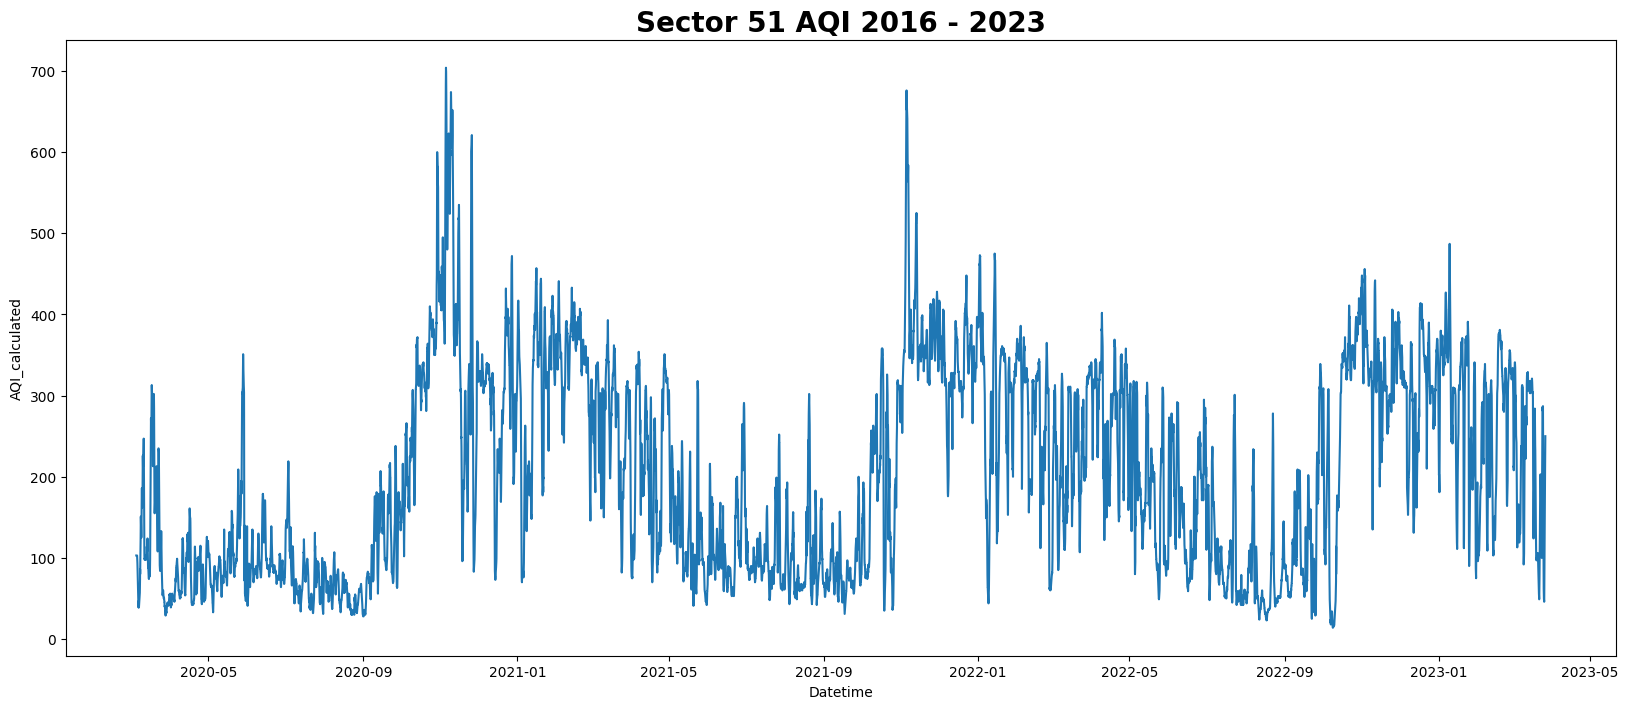

In [9]:
plt.figure(figsize=(20,8))
sns.lineplot(data = sector_51['AQI_calculated'], errorbar=None)
plt.title('Sector 51 AQI 2016 - 2023', fontdict= {"fontsize": 20, "fontweight": "bold"})

In [10]:
sector_51 = sector_51[[
    'PM2.5', 'PM2.5_24_avg', 'Day', 'Month', 'Year', 'Week', 'Hour',
    'PM2.5_24_avg_Sub_Index', 'AQI_calculated'
]]
sector_51

,PM2.5,PM2.5_24_avg,Day,Month,Year,Week,Hour,PM2.5_24_avg_Sub_Index,AQI_calculated
Datetime,,,,,,,,,
2020-03-04 23:00:00,61.64,61.640000,4,3,2020,10,23,103,103
2020-03-05 00:00:00,61.64,61.640000,5,3,2020,10,0,103,103
2020-03-05 01:00:00,61.64,61.640000,5,3,2020,10,1,103,103
2020-03-05 02:00:00,61.64,61.640000,5,3,2020,10,2,103,103
2020-03-05 03:00:00,61.64,61.640000,5,3,2020,10,3,103,103
...,...,...,...,...,...,...,...,...,...
2023-03-26 12:00:00,79.90,94.651250,26,3,2023,12,12,213,213
2023-03-26 13:00:00,86.35,97.460417,26,3,2023,12,13,223,223
2023-03-26 14:00:00,85.30,100.111250,26,3,2023,12,14,232,232


In [11]:
sector_51['AQI_first_diff'] = sector_51['AQI_calculated'].diff()[1:]
sector_51['PM2.5_first_diff'] = sector_51['PM2.5'].diff()[1:]
sector_51

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_16342/676117095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_51['AQI_first_diff'] = sector_51['AQI_calculated'].diff()[1:]
/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_16342/676117095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_51['PM2.5_first_diff'] = sector_51['PM2.5'].diff()[1:]


,PM2.5,PM2.5_24_avg,Day,Month,Year,Week,Hour,PM2.5_24_avg_Sub_Index,AQI_calculated,AQI_first_diff,PM2.5_first_diff
Datetime,,,,,,,,,,,
2020-03-04 23:00:00,61.64,61.640000,4,3,2020,10,23,103,103,NaN,NaN
2020-03-05 00:00:00,61.64,61.640000,5,3,2020,10,0,103,103,0.0,0.00
2020-03-05 01:00:00,61.64,61.640000,5,3,2020,10,1,103,103,0.0,0.00
2020-03-05 02:00:00,61.64,61.640000,5,3,2020,10,2,103,103,0.0,0.00
2020-03-05 03:00:00,61.64,61.640000,5,3,2020,10,3,103,103,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-26 12:00:00,79.90,94.651250,26,3,2023,12,12,213,213,8.0,7.85
2023-03-26 13:00:00,86.35,97.460417,26,3,2023,12,13,223,223,10.0,6.45
2023-03-26 14:00:00,85.30,100.111250,26,3,2023,12,14,232,232,9.0,-1.05


In [13]:
sector_51.dropna(inplace=True)

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_16342/2726783045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_51.dropna(inplace=True)


Datetime
2020-03-05 00:00:00    0.369638
2020-03-05 01:00:00    0.228248
2020-03-05 02:00:00    0.201198
2020-03-05 03:00:00    0.093167
2020-03-05 04:00:00   -0.005399
Name: seasonal, dtype: float64


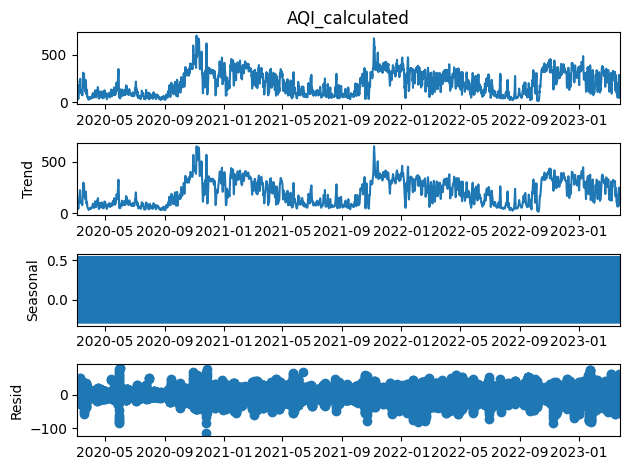

In [14]:
import statsmodels.api as sm

# Run seasonal decompose
decomp = sm.tsa.seasonal_decompose(sector_51['AQI_calculated']) # capturing the yearly seasonal component; i.e. for example 
#... every July the energy consumption is high and then it gets lower during the winter months. 
#...So, a periodicity of 24hours*365 was used here.

print(decomp.seasonal.head()) # checking the seasonal component
_ = decomp.plot()

In [15]:
from statsmodels.tsa.stattools import adfuller
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print("# lags used", result[2])
    print("critical values", result[4]) 

In [16]:
perform_adf_test(sector_51['AQI_calculated'])

ADF Statistic: -6.689513
p-value: 0.000000
# lags used 49
critical values {'1%': -3.4305944741356043, '5%': -2.8616480504777546, '10%': -2.5668275120558266}


# Prophet - hourly data

In [17]:
from prophet import Prophet

In [18]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot

In [21]:
# Create a new df
sector_51_prophet = sector_51.copy()
sector_51_prophet

,PM2.5,PM2.5_24_avg,Day,Month,Year,Week,Hour,PM2.5_24_avg_Sub_Index,AQI_calculated,AQI_first_diff,PM2.5_first_diff
Datetime,,,,,,,,,,,
2020-03-05 00:00:00,61.64,61.640000,5,3,2020,10,0,103,103,0.0,0.00
2020-03-05 01:00:00,61.64,61.640000,5,3,2020,10,1,103,103,0.0,0.00
2020-03-05 02:00:00,61.64,61.640000,5,3,2020,10,2,103,103,0.0,0.00
2020-03-05 03:00:00,61.64,61.640000,5,3,2020,10,3,103,103,0.0,0.00
2020-03-05 04:00:00,61.64,61.640000,5,3,2020,10,4,103,103,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-26 12:00:00,79.90,94.651250,26,3,2023,12,12,213,213,8.0,7.85
2023-03-26 13:00:00,86.35,97.460417,26,3,2023,12,13,223,223,10.0,6.45
2023-03-26 14:00:00,85.30,100.111250,26,3,2023,12,14,232,232,9.0,-1.05


In [24]:
sector_51_prophet = sector_51_prophet.reset_index()
sector_51_prophet

,Datetime,PM2.5,PM2.5_24_avg,Day,Month,Year,Week,Hour,PM2.5_24_avg_Sub_Index,AQI_calculated,AQI_first_diff,PM2.5_first_diff
0,2020-03-05 00:00:00,61.64,61.640000,5,3,2020,10,0,103,103,0.0,0.00
1,2020-03-05 01:00:00,61.64,61.640000,5,3,2020,10,1,103,103,0.0,0.00
2,2020-03-05 02:00:00,61.64,61.640000,5,3,2020,10,2,103,103,0.0,0.00
3,2020-03-05 03:00:00,61.64,61.640000,5,3,2020,10,3,103,103,0.0,0.00
4,2020-03-05 04:00:00,61.64,61.640000,5,3,2020,10,4,103,103,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
26796,2023-03-26 12:00:00,79.90,94.651250,26,3,2023,12,12,213,213,8.0,7.85
26797,2023-03-26 13:00:00,86.35,97.460417,26,3,2023,12,13,223,223,10.0,6.45
26798,2023-03-26 14:00:00,85.30,100.111250,26,3,2023,12,14,232,232,9.0,-1.05
26799,2023-03-26 15:00:00,86.78,102.730000,26,3,2023,12,15,241,241,9.0,1.48


In [25]:
sector_51_prophet = sector_51_prophet[['Datetime', 'AQI_calculated']]
sector_51_prophet

,Datetime,AQI_calculated
0,2020-03-05 00:00:00,103
1,2020-03-05 01:00:00,103
2,2020-03-05 02:00:00,103
3,2020-03-05 03:00:00,103
4,2020-03-05 04:00:00,103
...,...,...
26796,2023-03-26 12:00:00,213
26797,2023-03-26 13:00:00,223
26798,2023-03-26 14:00:00,232
26799,2023-03-26 15:00:00,241


In [61]:
int(len(sector_51_prophet)*.80)

21440

In [62]:
int(len(sector_51_prophet)*.20)

5360

In [26]:
sector_51_prophet.rename(columns={"Datetime": "ds", "AQI_calculated":"y"}, inplace=True)

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_16342/720014493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_51_prophet.rename(columns={"Datetime": "ds", "AQI_calculated":"y"}, inplace=True)


In [63]:
sector_51_prophet_train = sector_51_prophet[:int(len(sector_51_prophet)*.80)]
sector_51_prophet_train

,ds,y
0,2020-03-05 00:00:00,103
1,2020-03-05 01:00:00,103
2,2020-03-05 02:00:00,103
3,2020-03-05 03:00:00,103
4,2020-03-05 04:00:00,103
...,...,...
21435,2022-08-15 03:00:00,47
21436,2022-08-15 04:00:00,46
21437,2022-08-15 05:00:00,46
21438,2022-08-15 06:00:00,47


In [64]:
sector_51_prophet_test = sector_51_prophet[int(len(sector_51_prophet)*.80):]
sector_51_prophet_test

,ds,y
21440,2022-08-15 08:00:00,48
21441,2022-08-15 09:00:00,48
21442,2022-08-15 10:00:00,49
21443,2022-08-15 11:00:00,49
21444,2022-08-15 12:00:00,49
...,...,...
26796,2023-03-26 12:00:00,213
26797,2023-03-26 13:00:00,223
26798,2023-03-26 14:00:00,232
26799,2023-03-26 15:00:00,241


In [65]:
sector_51_prophet_test

,ds,y
21440,2022-08-15 08:00:00,48
21441,2022-08-15 09:00:00,48
21442,2022-08-15 10:00:00,49
21443,2022-08-15 11:00:00,49
21444,2022-08-15 12:00:00,49
...,...,...
26796,2023-03-26 12:00:00,213
26797,2023-03-26 13:00:00,223
26798,2023-03-26 14:00:00,232
26799,2023-03-26 15:00:00,241


Text(0.5, 1.0, 'Train and test split')

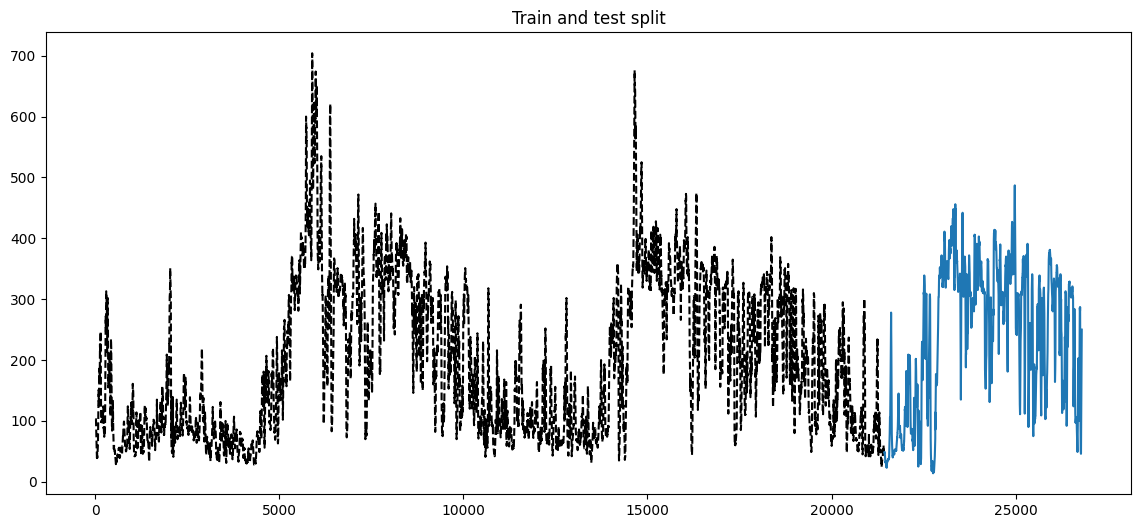

In [68]:
plt.figure(figsize=(14,6))
plt.plot(sector_51_prophet_train['y'] ,'k--')
plt.plot(sector_51_prophet_test['y'] )
plt.title("Train and test split")

In [70]:
# Initialize the Model
model=Prophet()
model.fit(sector_51_prophet_train)

07:36:44 - cmdstanpy - INFO - Chain [1] start processing
07:36:55 - cmdstanpy - INFO - Chain [1] done processing


In [71]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [32]:
### Create future dates of 365 days
# future_dates=model.make_future_dataframe(periods=365)

In [33]:
# future_dates.tail()

,ds
27161,2024-03-21 16:00:00
27162,2024-03-22 16:00:00
27163,2024-03-23 16:00:00
27164,2024-03-24 16:00:00
27165,2024-03-25 16:00:00


In [34]:
# prediction=model.predict(future_dates)

In [72]:
prediction = model.predict(sector_51_prophet_test)

In [73]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-08-15 08:00:00,213.979168,-15.231847,148.301020,213.979168,213.979168,-146.145872,-146.145872,-146.145872,0.055818,...,-4.173462,-4.173462,-4.173462,-142.028227,-142.028227,-142.028227,0.0,0.0,0.0,67.833297
1,2022-08-15 09:00:00,213.983893,-8.462470,157.278845,213.983893,213.983893,-146.233610,-146.233610,-146.233610,0.068082,...,-4.236300,-4.236300,-4.236300,-142.065391,-142.065391,-142.065391,0.0,0.0,0.0,67.750283
2,2022-08-15 10:00:00,213.988617,-17.815620,154.825803,213.988617,213.988617,-146.376230,-146.376230,-146.376230,0.015689,...,-4.289222,-4.289222,-4.289222,-142.102697,-142.102697,-142.102697,0.0,0.0,0.0,67.612387
3,2022-08-15 11:00:00,213.993341,-21.654489,149.913000,213.993341,213.993341,-146.543292,-146.543292,-146.543292,-0.073695,...,-4.329451,-4.329451,-4.329451,-142.140146,-142.140146,-142.140146,0.0,0.0,0.0,67.450049
4,2022-08-15 12:00:00,213.998065,-24.434050,149.800582,213.998065,213.998065,-146.675444,-146.675444,-146.675444,-0.143398,...,-4.354310,-4.354310,-4.354310,-142.177735,-142.177735,-142.177735,0.0,0.0,0.0,67.322621


In [79]:
sector_51_prophet_test['y']

21440     48
21441     48
21442     49
21443     49
21444     49
        ... 
26796    213
26797    223
26798    232
26799    241
26800    250
Name: y, Length: 5361, dtype: int64

In [81]:
prediction['yhat'] = prediction['yhat'].astype(int)

In [86]:
residuals = sector_51_prophet_test['y'].values - prediction['yhat'].values
residuals

array([-19, -19, -18, ..., -53, -44, -35])

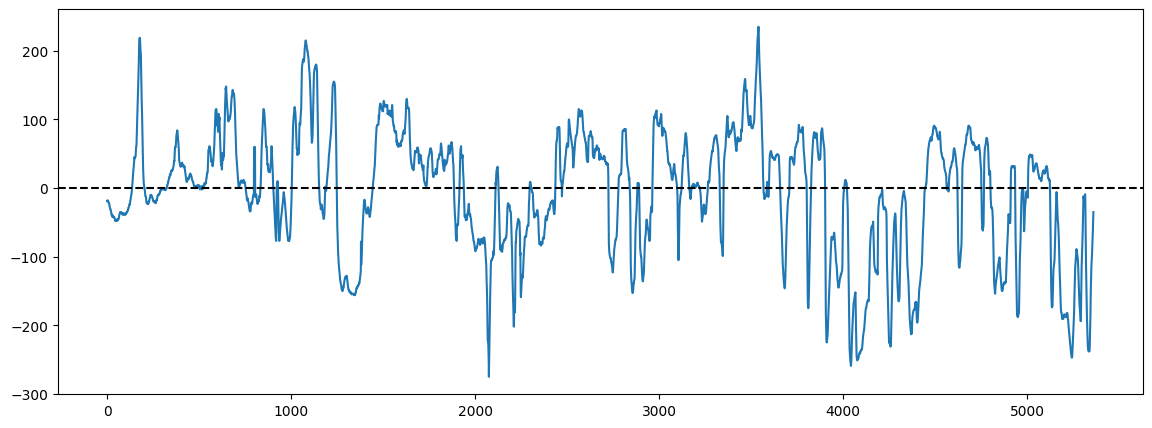

In [89]:
plt.figure(figsize=(14,5))
plt.plot(residuals)
# plt.axhline(0,'k--')
plt.axhline(0, linestyle='--', color='k')

Text(0.5, 1.0, 'Prophet actual vs predicted')

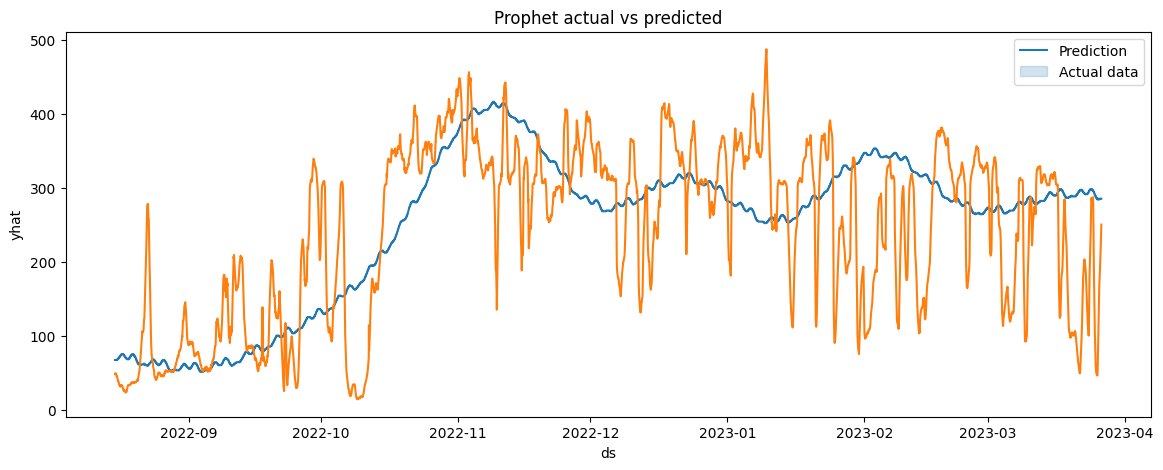

In [91]:
plt.figure(figsize=(14,5))
# plt.plot(prediction['yhat'],'k--')
# plt.plot(sector_51_prophet_test['y'])
sns.lineplot(data = prediction, x='ds', y='yhat')
sns.lineplot(data = sector_51_prophet_test, x='ds', y='y')
plt.legend(('Prediction','Actual data'))
plt.title("Prophet actual vs predicted")

<AxesSubplot: xlabel='ds', ylabel='yhat'>

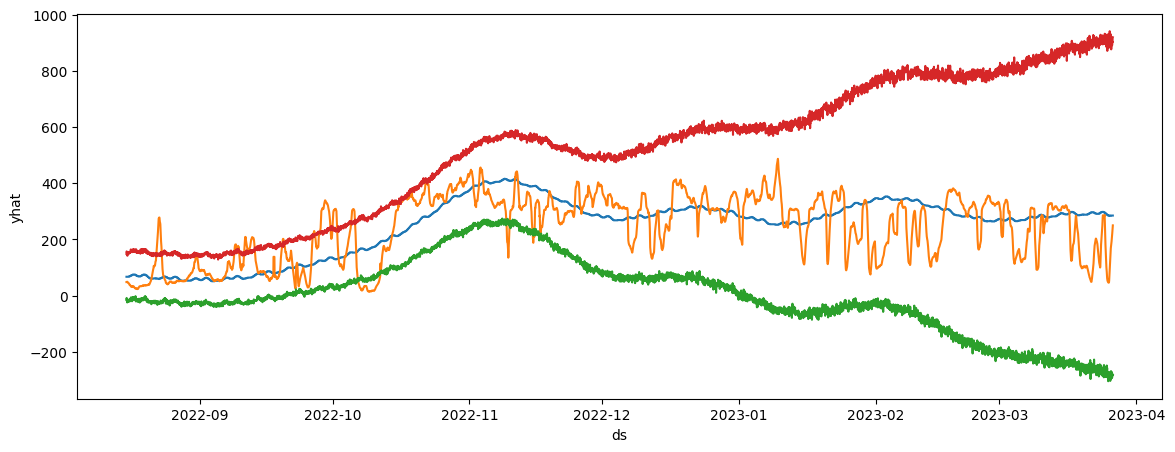

In [93]:
plt.figure(figsize=(14,5))
sns.lineplot(data = prediction, x='ds', y='yhat')
sns.lineplot(data = sector_51_prophet_test, x='ds', y='y')
sns.lineplot(data = prediction, x='ds', y='yhat_lower')
sns.lineplot(data = prediction, x='ds', y='yhat_upper')
# plt.legend("Prophet actual vs predicted")

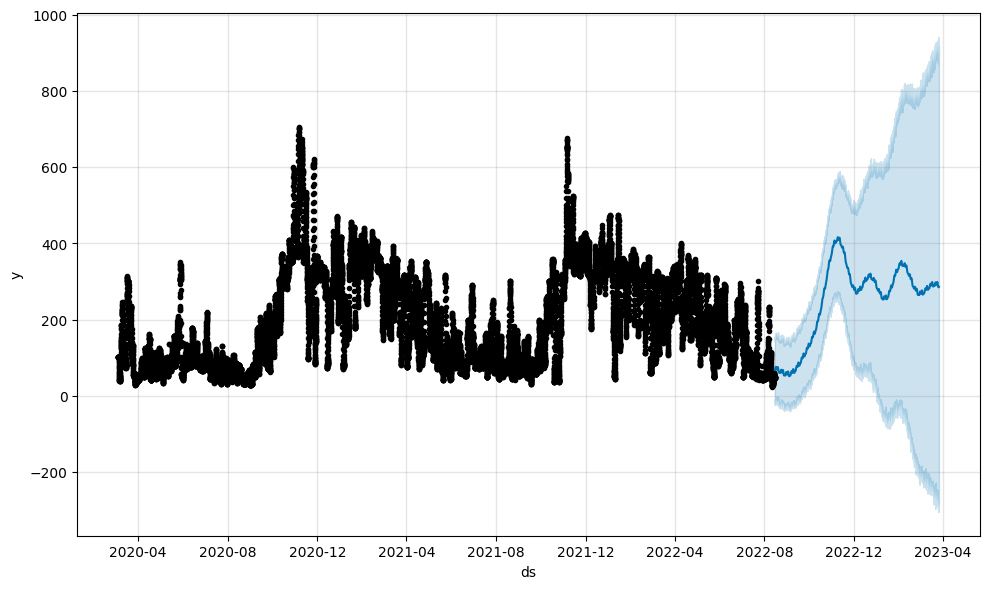

In [77]:
### plot the predicted projection
plot = model.plot(prediction)

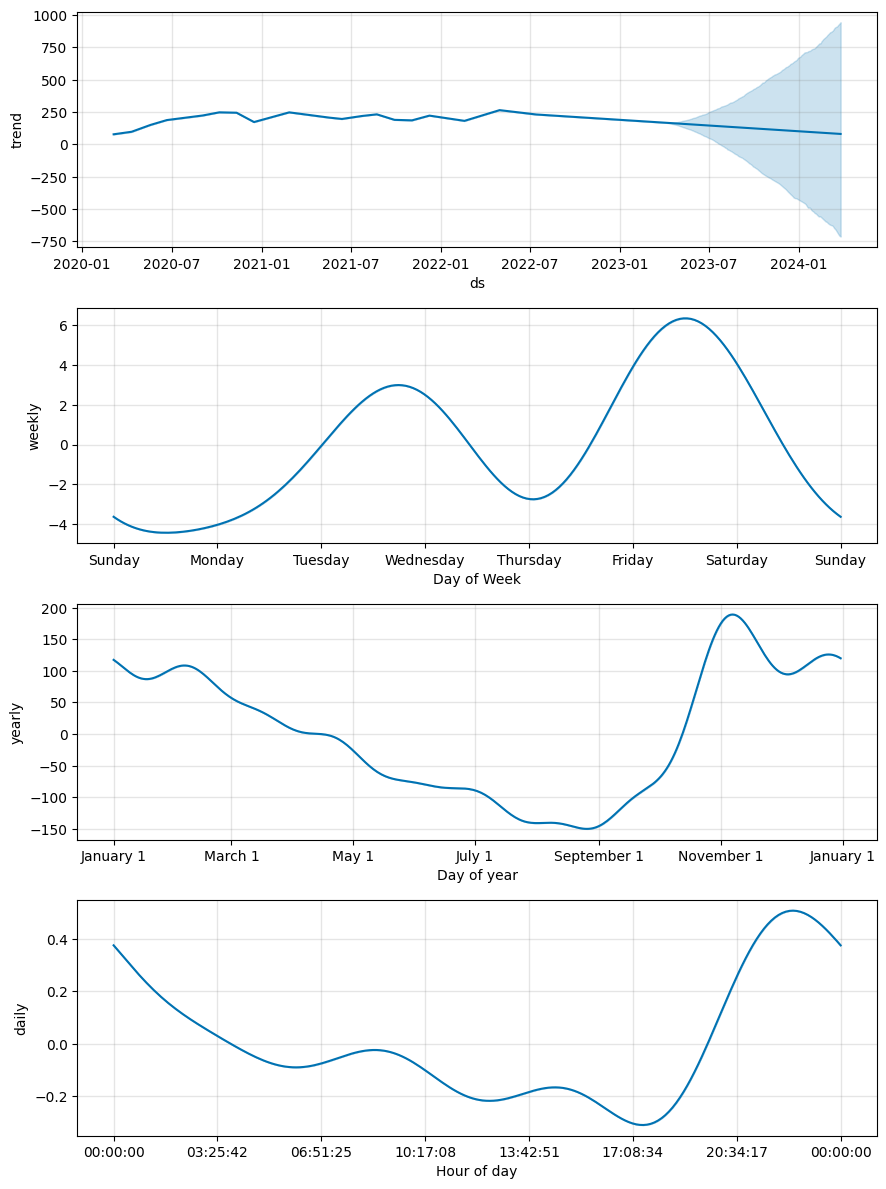

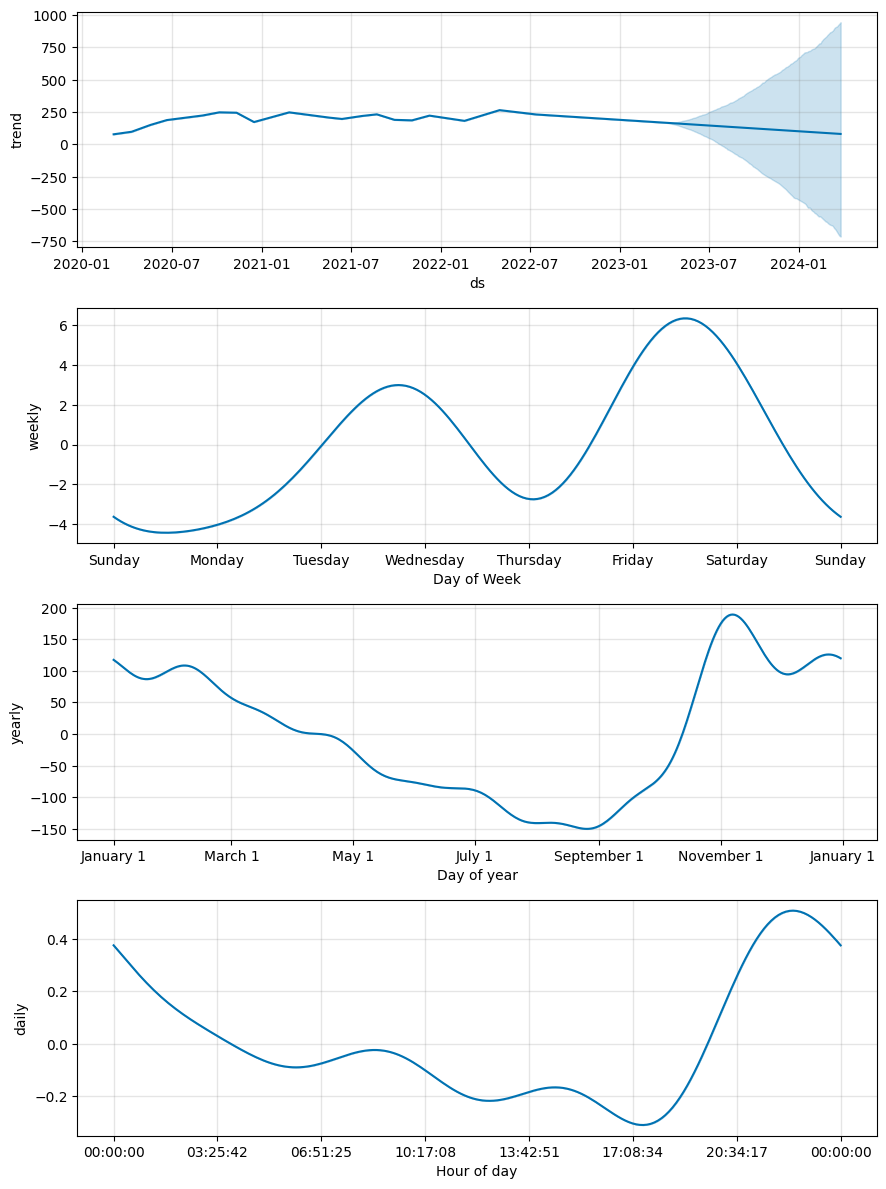

In [37]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [39]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

  0%|          | 0/1 [00:00<?, ?it/s]

14:53:43 - cmdstanpy - INFO - Chain [1] start processing
14:53:48 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-03-26 17:00:00,181.812124,89.481545,267.372535,208,2022-03-26 16:00:00
1,2022-03-26 18:00:00,181.491659,101.024932,274.345560,209,2022-03-26 16:00:00
2,2022-03-26 19:00:00,181.379459,94.744048,258.985957,209,2022-03-26 16:00:00
3,2022-03-26 20:00:00,181.442448,93.681633,268.311178,209,2022-03-26 16:00:00
4,2022-03-26 21:00:00,181.573311,96.713915,261.315990,211,2022-03-26 16:00:00


In [40]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days 12:00:00,15122.415840,122.973232,108.641478,0.358378,0.420258,0.453393,0.335616
1,36 days 13:00:00,15123.855341,122.979085,108.661951,0.358464,0.420258,0.453495,0.335616
2,36 days 14:00:00,15123.959806,122.979510,108.663796,0.358477,0.420258,0.453510,0.335616
3,36 days 15:00:00,15123.349125,122.977027,108.649500,0.358417,0.420258,0.453443,0.335616
4,36 days 16:00:00,15122.524334,122.973673,108.624977,0.358305,0.420258,0.453321,0.335616


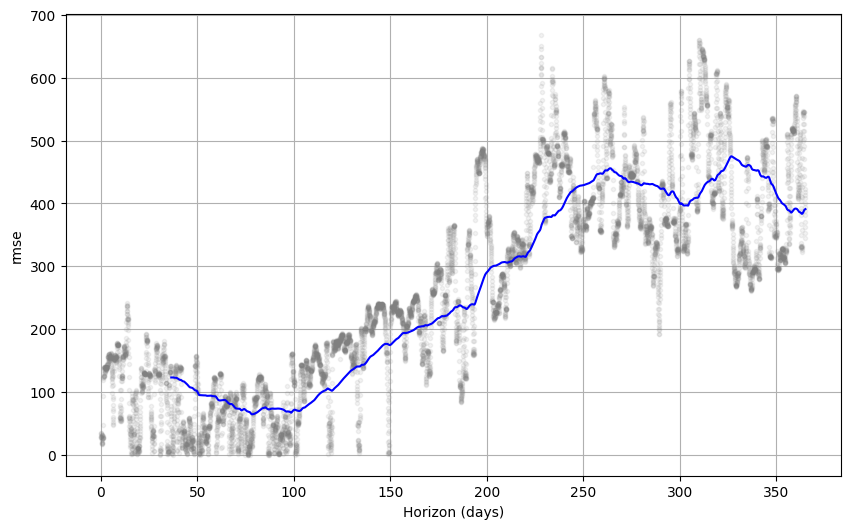

In [41]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

# Prophet - daily data

In [30]:
sector_51_daily = sector_51.copy()
sector_51_daily = sector_51_daily.resample('D').mean()
sector_51_daily

,PM2.5,PM2.5_24_avg,Day,Month,Year,Week,Hour,PM2.5_24_avg_Sub_Index,AQI_calculated,AQI_first_diff,PM2.5_first_diff
Datetime,,,,,,,,,,,
2020-03-05,52.930000,60.251927,5.0,3.0,2020.0,10.0,11.5,100.375000,100.541667,-0.625000,-1.715417
2020-03-06,22.327083,32.732830,6.0,3.0,2020.0,10.0,11.5,53.833333,55.958333,-1.833333,0.454167
2020-03-07,42.124167,29.576337,7.0,3.0,2020.0,10.0,11.5,48.583333,49.416667,1.208333,2.556667
2020-03-08,68.285000,65.330469,8.0,3.0,2020.0,10.0,11.5,119.208333,120.208333,2.208333,-0.923333
2020-03-09,84.637083,79.038316,9.0,3.0,2020.0,11.0,11.5,161.958333,162.625000,2.333333,3.687500
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-22,90.135833,74.099531,22.0,3.0,2023.0,12.0,11.5,149.416667,149.833333,5.625000,-0.690417
2023-03-23,81.439167,73.945417,23.0,3.0,2023.0,12.0,11.5,144.833333,145.291667,-1.125000,5.630417
2023-03-24,89.015417,105.405903,24.0,3.0,2023.0,12.0,11.5,250.083333,250.500000,1.083333,-7.401250


In [43]:
# Initialize the Model
model=Prophet()

In [44]:
# Create a new df
sector_51_prophet_daily = sector_51_daily.copy()
sector_51_prophet_daily

,PM2.5,PM2.5_24_avg,Day,Month,Year,Week,Hour,PM2.5_24_avg_Sub_Index,AQI_calculated,AQI_first_diff,PM2.5_first_diff
Datetime,,,,,,,,,,,
2020-03-05,52.930000,60.251927,5.0,3.0,2020.0,10.0,11.5,100.375000,100.541667,-0.625000,-1.715417
2020-03-06,22.327083,32.732830,6.0,3.0,2020.0,10.0,11.5,53.833333,55.958333,-1.833333,0.454167
2020-03-07,42.124167,29.576337,7.0,3.0,2020.0,10.0,11.5,48.583333,49.416667,1.208333,2.556667
2020-03-08,68.285000,65.330469,8.0,3.0,2020.0,10.0,11.5,119.208333,120.208333,2.208333,-0.923333
2020-03-09,84.637083,79.038316,9.0,3.0,2020.0,11.0,11.5,161.958333,162.625000,2.333333,3.687500
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-22,90.135833,74.099531,22.0,3.0,2023.0,12.0,11.5,149.416667,149.833333,5.625000,-0.690417
2023-03-23,81.439167,73.945417,23.0,3.0,2023.0,12.0,11.5,144.833333,145.291667,-1.125000,5.630417
2023-03-24,89.015417,105.405903,24.0,3.0,2023.0,12.0,11.5,250.083333,250.500000,1.083333,-7.401250


In [45]:
sector_51_prophet_daily = sector_51_prophet_daily.reset_index()


In [46]:
sector_51_prophet_daily = sector_51_prophet_daily[['Datetime', 'AQI_calculated']]

In [47]:
sector_51_prophet_daily.rename(columns={"Datetime": "ds", "AQI_calculated":"y"}, inplace=True)

In [48]:
sector_51_prophet_daily

,ds,y
0,2020-03-05,100.541667
1,2020-03-06,55.958333
2,2020-03-07,49.416667
3,2020-03-08,120.208333
4,2020-03-09,162.625000
...,...,...
1112,2023-03-22,149.833333
1113,2023-03-23,145.291667
1114,2023-03-24,250.500000
1115,2023-03-25,80.166667


In [49]:
model.fit(sector_51_prophet)

14:58:15 - cmdstanpy - INFO - Chain [1] start processing
14:58:29 - cmdstanpy - INFO - Chain [1] done processing


In [51]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)
future_dates

,ds
0,2020-03-05 00:00:00
1,2020-03-05 01:00:00
2,2020-03-05 02:00:00
3,2020-03-05 03:00:00
4,2020-03-05 04:00:00
...,...
27161,2024-03-21 16:00:00
27162,2024-03-22 16:00:00
27163,2024-03-23 16:00:00
27164,2024-03-24 16:00:00


In [52]:
prediction=model.predict(future_dates)

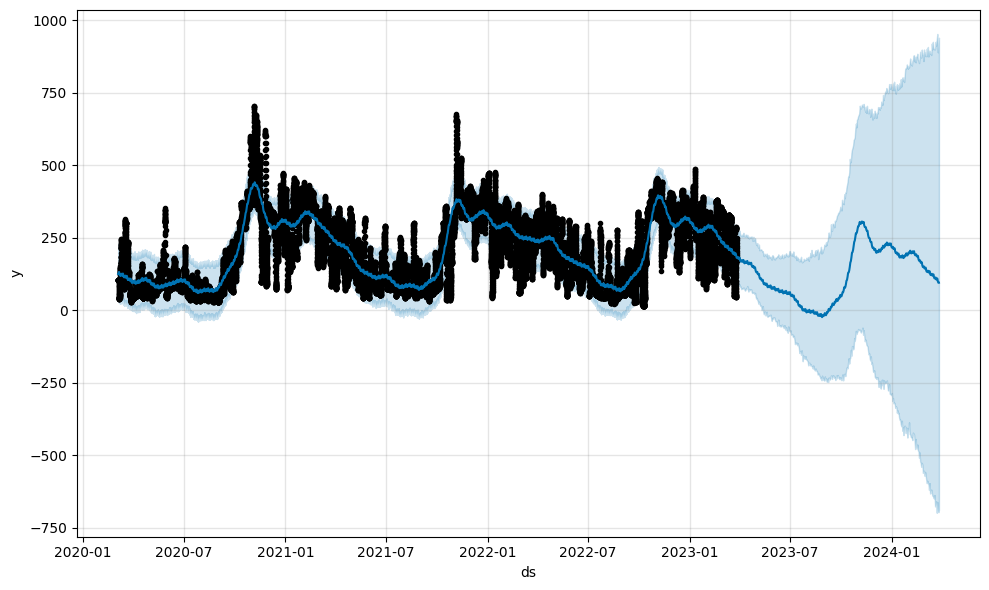

In [54]:
### plot the predicted projection
plot = model.plot(prediction)

In [55]:
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

  0%|          | 0/1 [00:00<?, ?it/s]

15:00:37 - cmdstanpy - INFO - Chain [1] start processing
15:00:42 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-03-26 17:00:00,181.812124,92.543443,263.093928,208,2022-03-26 16:00:00
1,2022-03-26 18:00:00,181.491659,92.877468,264.058274,209,2022-03-26 16:00:00
2,2022-03-26 19:00:00,181.379459,99.526800,262.385107,209,2022-03-26 16:00:00
3,2022-03-26 20:00:00,181.442448,93.623967,262.774832,209,2022-03-26 16:00:00
4,2022-03-26 21:00:00,181.573311,96.239870,265.711706,211,2022-03-26 16:00:00


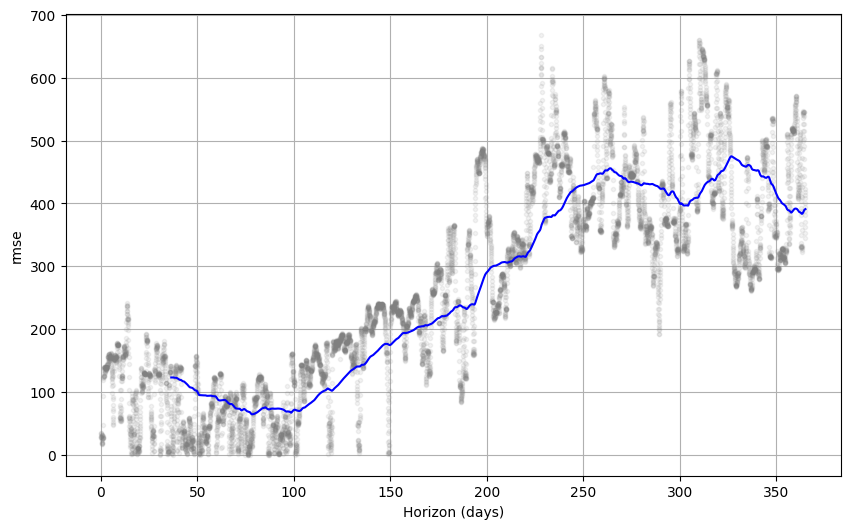

In [56]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

### Train test split

In [94]:
sector_51_prophet_daily

,ds,y
0,2020-03-05,100.541667
1,2020-03-06,55.958333
2,2020-03-07,49.416667
3,2020-03-08,120.208333
4,2020-03-09,162.625000
...,...,...
1112,2023-03-22,149.833333
1113,2023-03-23,145.291667
1114,2023-03-24,250.500000
1115,2023-03-25,80.166667


In [95]:
sector_51_prophet_daily_train = sector_51_prophet_daily[:int(len(sector_51_prophet_daily)*.80)]

In [96]:
sector_51_prophet_daily_test = sector_51_prophet_daily[int(len(sector_51_prophet_daily)*.80):]

Text(0.5, 1.0, 'Train and test split')

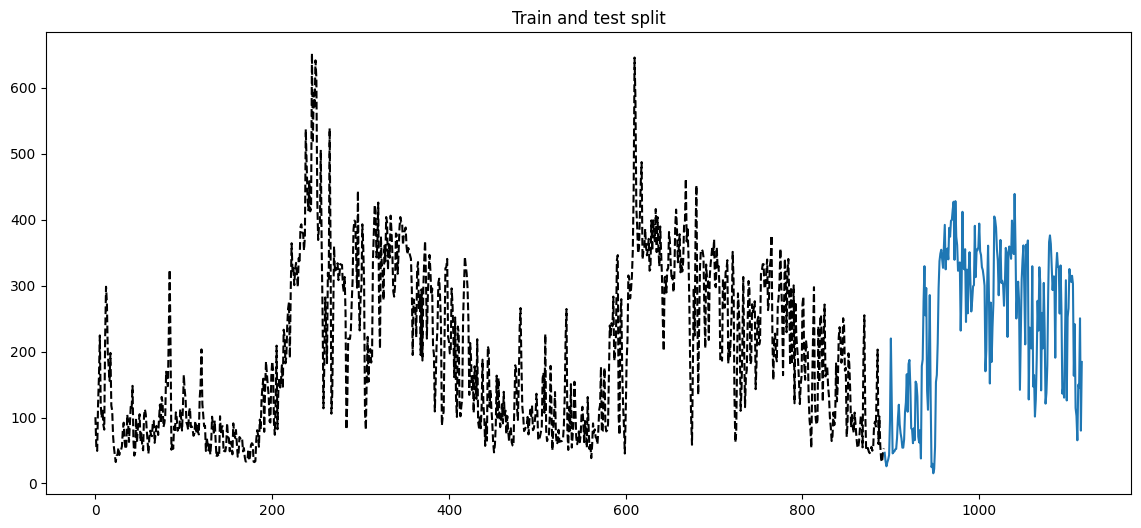

In [97]:
plt.figure(figsize=(14,6))
plt.plot(sector_51_prophet_daily_train['y'] ,'k--')
plt.plot(sector_51_prophet_daily_test['y'] )
plt.title("Train and test split")

In [98]:
# Initialize the Model
model=Prophet()
model.fit(sector_51_prophet_daily_train)

07:51:10 - cmdstanpy - INFO - Chain [1] start processing
07:51:11 - cmdstanpy - INFO - Chain [1] done processing


In [102]:
prediction = model.predict(sector_51_prophet_daily_test)

prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-08-15,228.893598,5.073837,186.721434,228.893598,228.893598,-133.033799,-133.033799,-133.033799,-5.342671,-5.342671,-5.342671,-127.691128,-127.691128,-127.691128,0.0,0.0,0.0,95.859798
1,2022-08-16,228.957967,16.449655,186.295167,228.957967,228.957967,-123.995412,-123.995412,-123.995412,3.577234,3.577234,3.577234,-127.572645,-127.572645,-127.572645,0.0,0.0,0.0,104.962555
2,2022-08-17,229.022335,13.134804,190.475176,229.022335,229.022335,-126.283596,-126.283596,-126.283596,1.243289,1.243289,1.243289,-127.526885,-127.526885,-127.526885,0.0,0.0,0.0,102.738739
3,2022-08-18,229.086704,14.453624,187.981973,229.086704,229.086704,-126.048434,-126.048434,-126.048434,1.506505,1.506505,1.506505,-127.554939,-127.554939,-127.554939,0.0,0.0,0.0,103.038270
4,2022-08-19,229.151072,21.180636,193.774229,229.151072,229.151072,-121.563656,-121.563656,-121.563656,6.091949,6.091949,6.091949,-127.655606,-127.655606,-127.655606,0.0,0.0,0.0,107.587416


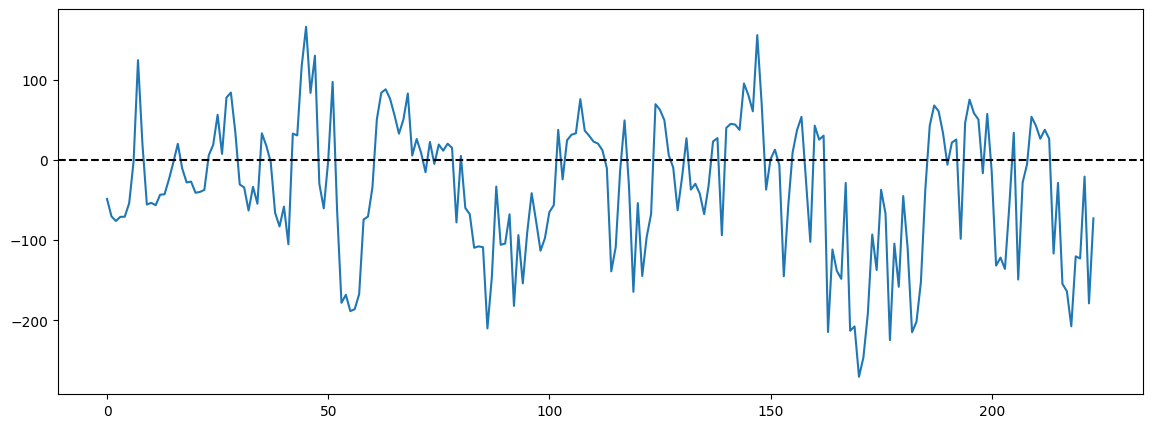

In [103]:
prediction['yhat'] = prediction['yhat'].astype(int)

residuals = sector_51_prophet_daily_test['y'].values - prediction['yhat'].values

plt.figure(figsize=(14,5))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')

Text(0.5, 1.0, 'Prophet actual vs predicted')

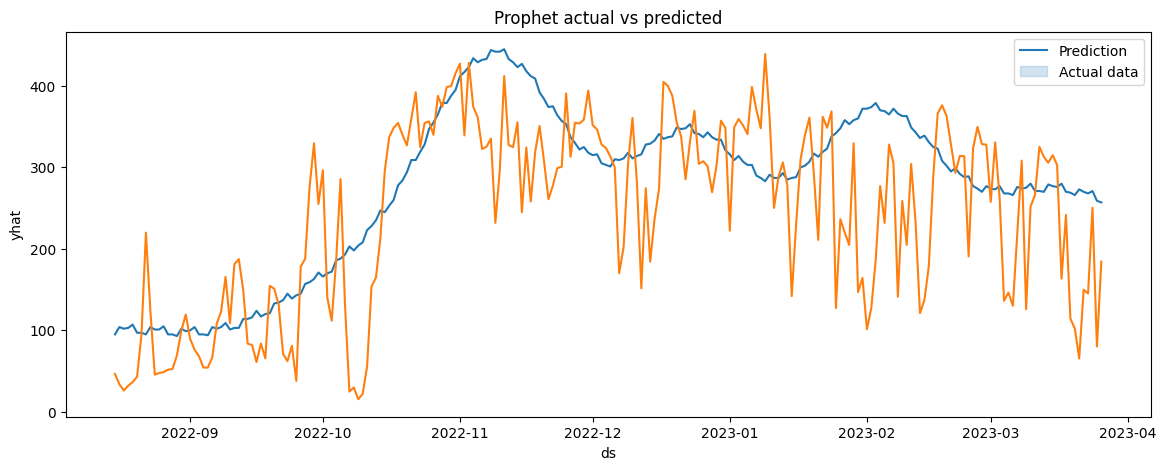

In [104]:
plt.figure(figsize=(14,5))
sns.lineplot(data = prediction, x='ds', y='yhat')
sns.lineplot(data = sector_51_prophet_daily_test, x='ds', y='y')
plt.legend(('Prediction','Actual data'))
plt.title("Prophet actual vs predicted")

<AxesSubplot: xlabel='ds', ylabel='yhat'>

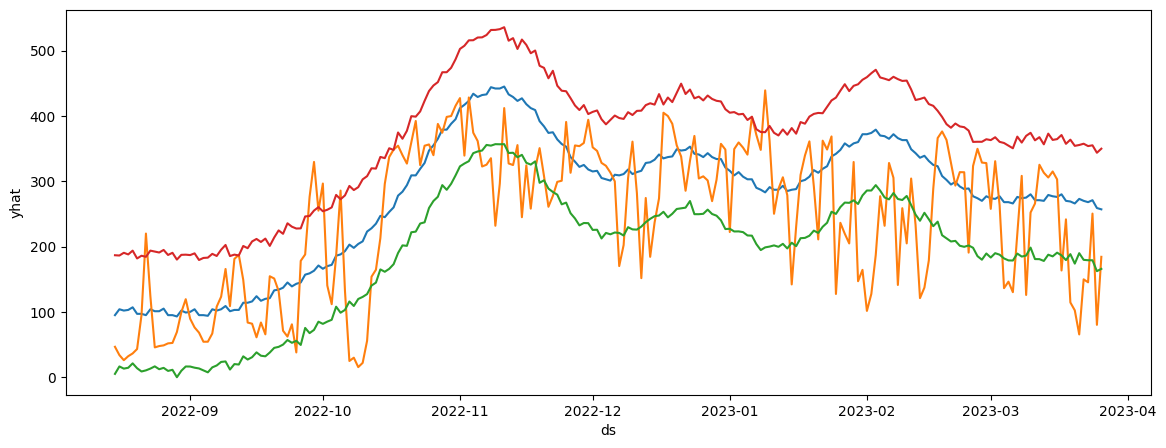

In [105]:
plt.figure(figsize=(14,5))
sns.lineplot(data = prediction, x='ds', y='yhat')
sns.lineplot(data = sector_51_prophet_daily_test, x='ds', y='y')
sns.lineplot(data = prediction, x='ds', y='yhat_lower')
sns.lineplot(data = prediction, x='ds', y='yhat_upper')
# plt.legend("Prophet actual vs predicted")

### Forecasting only 1 week

In [107]:
sector_51_prophet_daily[:int(len(sector_51_prophet_daily)*.98)]

,ds,y
0,2020-03-05,100.541667
1,2020-03-06,55.958333
2,2020-03-07,49.416667
3,2020-03-08,120.208333
4,2020-03-09,162.625000
...,...,...
1089,2023-02-27,328.583333
1090,2023-02-28,327.833333
1091,2023-03-01,257.708333
1092,2023-03-02,330.708333


In [108]:
sector_51_prophet_daily_train = sector_51_prophet_daily[:int(len(sector_51_prophet_daily)*.98)]

sector_51_prophet_daily_test = sector_51_prophet_daily[int(len(sector_51_prophet_daily)*.98):]

Text(0.5, 1.0, 'Train and test split')

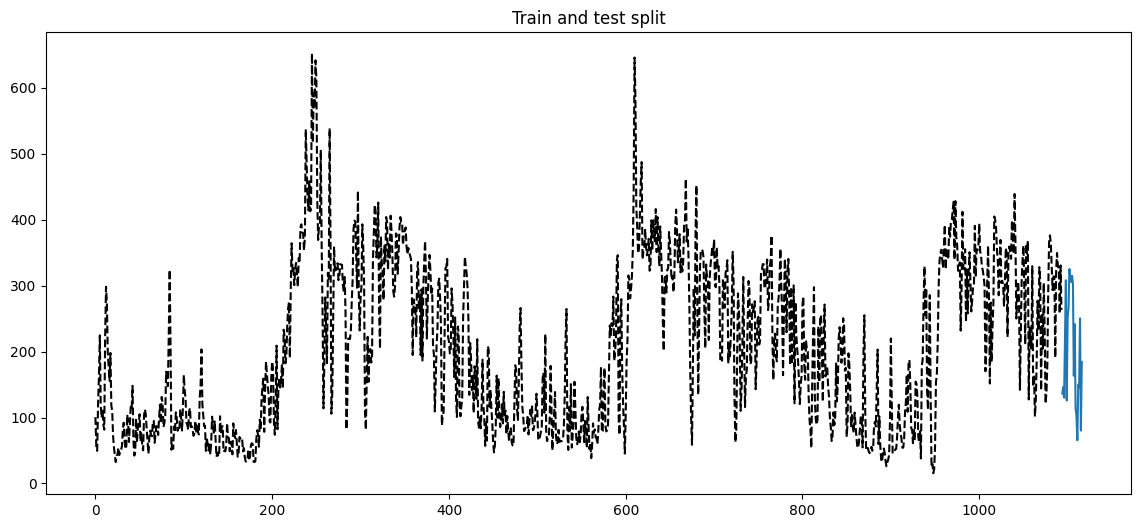

In [109]:
plt.figure(figsize=(14,6))
plt.plot(sector_51_prophet_daily_train['y'] ,'k--')
plt.plot(sector_51_prophet_daily_test['y'] )
plt.title("Train and test split")

In [110]:
# Initialize the Model
model=Prophet()
model.fit(sector_51_prophet_daily_train)

prediction = model.predict(sector_51_prophet_daily_test)

prediction.head()

07:54:48 - cmdstanpy - INFO - Chain [1] start processing
07:54:48 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-03-04,209.252513,162.499497,339.548540,209.252513,209.252513,42.912853,42.912853,42.912853,-0.114456,-0.114456,-0.114456,43.027309,43.027309,43.027309,0.0,0.0,0.0,252.165366
1,2023-03-05,209.237228,153.472625,339.236429,209.237228,209.237228,38.474849,38.474849,38.474849,-3.278704,-3.278704,-3.278704,41.753553,41.753553,41.753553,0.0,0.0,0.0,247.712077
2,2023-03-06,209.221943,158.203682,337.061375,209.221943,209.221943,37.295035,37.295035,37.295035,-3.305939,-3.305939,-3.305939,40.600974,40.600974,40.600974,0.0,0.0,0.0,246.516978
3,2023-03-07,209.206658,156.849372,340.883643,209.206658,209.206658,43.551855,43.551855,43.551855,3.998017,3.998017,3.998017,39.553838,39.553838,39.553838,0.0,0.0,0.0,252.758513
4,2023-03-08,209.191374,155.024889,332.667629,209.191374,209.191374,35.793176,35.793176,35.793176,-2.801115,-2.801115,-2.801115,38.594291,38.594291,38.594291,0.0,0.0,0.0,244.984549


In [111]:
prediction['yhat'] = prediction['yhat'].astype(int)
residuals = sector_51_prophet_daily_test['y'].values - prediction['yhat'].values

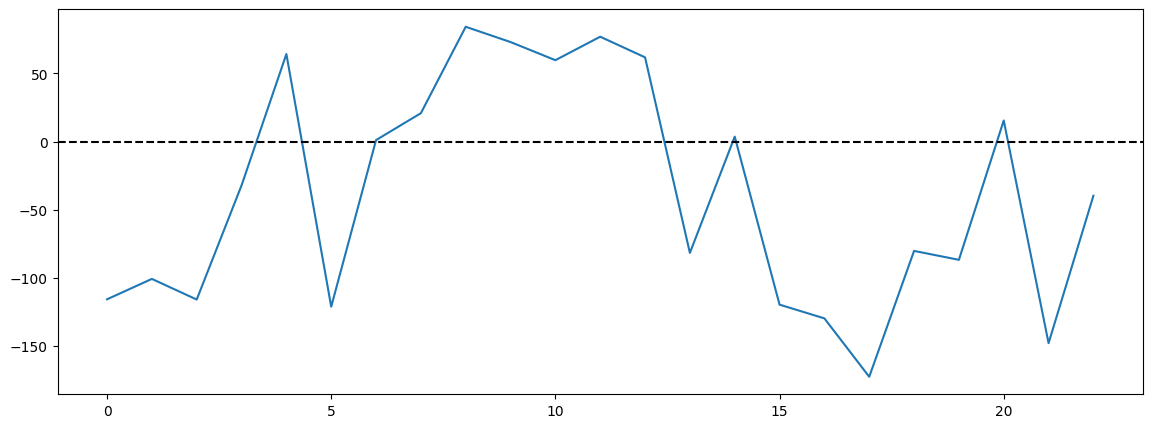

In [112]:
plt.figure(figsize=(14,5))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')

Text(0.5, 1.0, 'Prophet actual vs predicted')

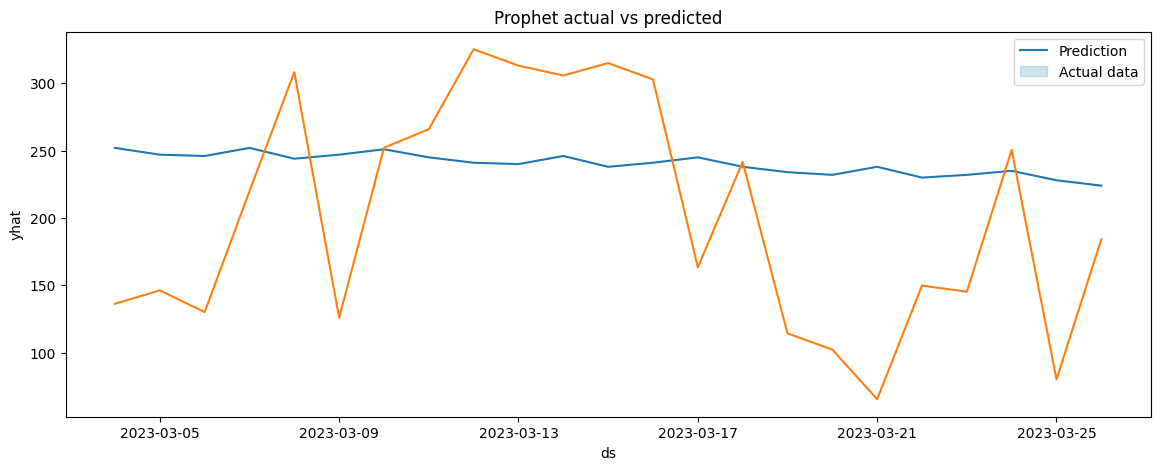

In [113]:
plt.figure(figsize=(14,5))
sns.lineplot(data = prediction, x='ds', y='yhat')
sns.lineplot(data = sector_51_prophet_daily_test, x='ds', y='y')
plt.legend(('Prediction','Actual data'))
plt.title("Prophet actual vs predicted")

<AxesSubplot: xlabel='ds', ylabel='y'>

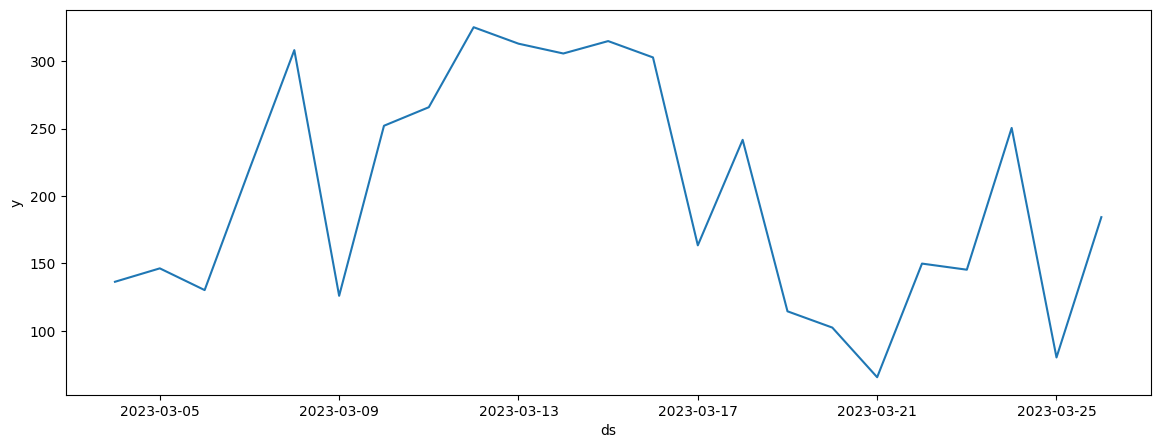

In [114]:
plt.figure(figsize=(14,5))
# sns.lineplot(data = prediction, x='ds', y='yhat')
sns.lineplot(data = sector_51_prophet_daily_test, x='ds', y='y')
# plt.legend(('Prediction','Actual data'))
# plt.title("Prophet actual vs predicted")

# Auto Arima

In [115]:
sector_51_daily

,PM2.5,PM2.5_24_avg,Day,Month,Year,Week,Hour,PM2.5_24_avg_Sub_Index,AQI_calculated,AQI_first_diff,PM2.5_first_diff
Datetime,,,,,,,,,,,
2020-03-05,52.930000,60.251927,5.0,3.0,2020.0,10.0,11.5,100.375000,100.541667,-0.625000,-1.715417
2020-03-06,22.327083,32.732830,6.0,3.0,2020.0,10.0,11.5,53.833333,55.958333,-1.833333,0.454167
2020-03-07,42.124167,29.576337,7.0,3.0,2020.0,10.0,11.5,48.583333,49.416667,1.208333,2.556667
2020-03-08,68.285000,65.330469,8.0,3.0,2020.0,10.0,11.5,119.208333,120.208333,2.208333,-0.923333
2020-03-09,84.637083,79.038316,9.0,3.0,2020.0,11.0,11.5,161.958333,162.625000,2.333333,3.687500
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-22,90.135833,74.099531,22.0,3.0,2023.0,12.0,11.5,149.416667,149.833333,5.625000,-0.690417
2023-03-23,81.439167,73.945417,23.0,3.0,2023.0,12.0,11.5,144.833333,145.291667,-1.125000,5.630417
2023-03-24,89.015417,105.405903,24.0,3.0,2023.0,12.0,11.5,250.083333,250.500000,1.083333,-7.401250


In [116]:
sector_51_daily.to_csv("sector_51_daily.csv")

In [ ]:
stepwise_fit = auto_arima(
    sector_51_daily['AQI_calculated'],
    suppress_warnings=True,
    d=1,  # non-seasonal difference order
    start_p=0,  # initial guess for p
    start_q=0,  # initial guess for q
    max_p=2,  # max value of p to test
    max_q=2,  # max value of q to test
    seasonal=True,  # is the time series seasonal? YES
    m=365,  # the seasonal period
    #D=1, # seasonal difference order
    start_P=1,  # initial guess for P
    start_Q=1,  # initial guess for Q
    max_P=1,  # max value of P to test
    max_Q=1,  # max value of Q to test
    information_criterion='aic',  # used to select best model
    trace=True,  # print results whilst training
    error_action='ignore',  # ignore orders that don't work
    stepwise=True  # apply intelligent order search
)
stepwise_fit.summary()